# Visualisation of reproduced results

In [76]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

## load data

In [77]:
# os.listdir()

In [147]:
path_to_results = "server_results/maze_trpo/"
file_name = "progress.csv"

data = np.array([])
num_runs = 6
for run in range(num_runs):
    file_path = path_to_results + "000" + str(run+1) + "/" + file_name
    with open(file_path, 'r') as csvfile:
        data_file = csv.reader(csvfile, delimiter=',', quotechar='|')

        file_content = []
        for row in data_file:
            file_content.append(row)
        
        file_data = np.array([])
        for row in file_content[1:]:
#             print(np.array([float(i) for i in row]).shape)
            file_data = np.append(file_data, np.array([float(i) for i in row]))
#     print(file_data.shape)
    file_data = np.reshape(file_data, -1,8)
    print(file_data[0])

    data = np.append(data, np.array([file_data]))

0.09666666666666666
1.0
0.0
0.0
0.01
-1861.4434317633088


In [139]:
print(type(data[0]))

<class 'numpy.float64'>


In [130]:
print(data)

[]


ValueError: setting an array element with a sequence.

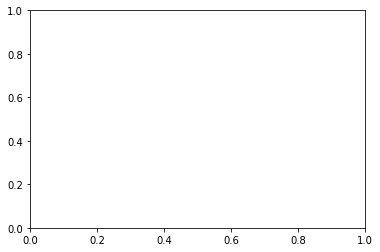

In [82]:
plt.plot(data[0,0,0])
plt.show()